## Animations

There are a lot of settings where it would be nice to be able to animate the plots to give a sense of the evolution of the setting being explored. There are a lot of ways of doing animations so I am going to clone a lot of the examples from matplotlib to help me understand the possibilities.

### First Steps

This has taken a lot of dancing around so far. This post has most helpful thus far...

[Embedding Animations in Jupyterlab](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/)

....keep going!

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

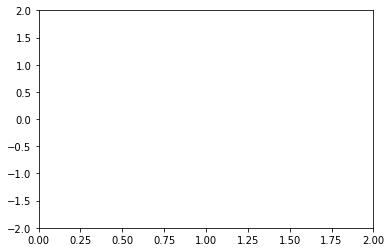

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)



In [5]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [6]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


In [7]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [8]:
#HTML(anim.to_html5_video())

In [9]:
anim._repr_html_() is None

True

In [10]:
anim

In [11]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [12]:
anim

In [16]:

#  import numpy as np
#  import matplotlib.pyplot as plt
#  import matplotlib.animation as animation
#  from IPython.display import HTML

#=========================================
# Create Fake Images using Numpy 
# You don't need this in your code as you have your own imageList.
# This is used as an example.

imageList = []
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    imageList.append(np.sin(x) + np.cos(y))

#=========================================
# Animate Fake Images (in Jupyter)

def getImageFromList(x):
    return imageList[x]

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(imageList)):
    im = plt.imshow(getImageFromList(i), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())

#=========================================
# Save animation as video (if required)
# ani.save('dynamic_images.mp4')


### Can I modify this previous animation...

Who knows if I understand it:)

```
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
```
This sets up the boundaries of the plot. The following discussion is helpful for me at the moment.

[useful discussion of plt.subplots](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

In [23]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, .5, 20)+ .05*i
    y = x - 0.1 * i
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim2 = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.close()

# Show the animation
HTML(anim2.to_html5_video())